In [1]:
%config Completer.use_jedi = False

In [2]:
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('./datalab/TrueValueCar/train.csv')

<IPython.core.display.Javascript object>

In [149]:
df.shape

(5022, 19)

In [7]:
            df.drop(columns=['id','car_name','rto','city','variant','ad_created_on','registered_city'], axis=1, inplace=True)

In [11]:
df.model = df.model.apply(lambda x : x.replace(' ',''))

In [24]:
df = df.groupby('model').filter(lambda x: len(x) > 9)

In [148]:
df.isna().sum()

yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
times_viewed           0
body_type              0
transmission           0
assured_buy            0
registered_state       0
is_hot                 0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
fitness_certificate    0
reserved               0
warranty_avail         0
dtype: int64

In [30]:
df.dropna(axis=0, inplace=True)

In [146]:
df.drop(columns=['booking_down_pymnt'], axis=1, inplace=True)

In [152]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,times_viewed,body_type,transmission,assured_buy,registered_state,is_hot,source,make,model,car_availability,total_owners,car_rating,fitness_certificate,reserved,warranty_avail
0,2015,1,8063,12.864626,18715,0,1,1,1,1,inperson_sale,10,54,in_stock,2,great,True,0,0
1,2016,1,23104,12.489366,2676,0,1,1,9,1,inperson_sale,10,4,in_stock,1,great,True,0,0
2,2017,1,23402,13.076736,609,0,1,1,9,1,inperson_sale,7,30,in_stock,1,great,True,0,0
3,2013,0,39124,12.637852,6511,0,1,1,1,1,inperson_sale,10,54,in_stock,1,great,True,0,0
4,2015,1,22116,12.798015,3225,0,1,0,1,1,inperson_sale,7,30,in_stock,1,great,True,0,0


In [127]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,emi_starts_from,booking_down_pymnt
count,5022.000000,5022.000000,5022.000000,5022.00000,5022.000000,5022.000000,5022.000000
mean,2013.798686,59332.403823,12.842508,1522.21127,1.314815,9619.296097,62120.237754
std,2.822417,33926.351761,0.425278,1809.24877,0.555840,4303.793431,27793.347207
min,2007.000000,60.000000,11.660474,3.00000,1.000000,2692.000000,17385.000000
25%,2012.000000,33030.250000,12.545127,616.25000,1.000000,6520.500000,42108.750000
50%,2014.000000,54835.000000,12.822876,1104.50000,1.000000,8608.000000,55590.000000
75%,2016.000000,81622.000000,13.127448,1877.00000,2.000000,11672.750000,75382.500000
max,2021.000000,158876.000000,14.019874,46141.00000,5.000000,28494.000000,184012.000000


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='car_availability', ylabel='sale_price'>

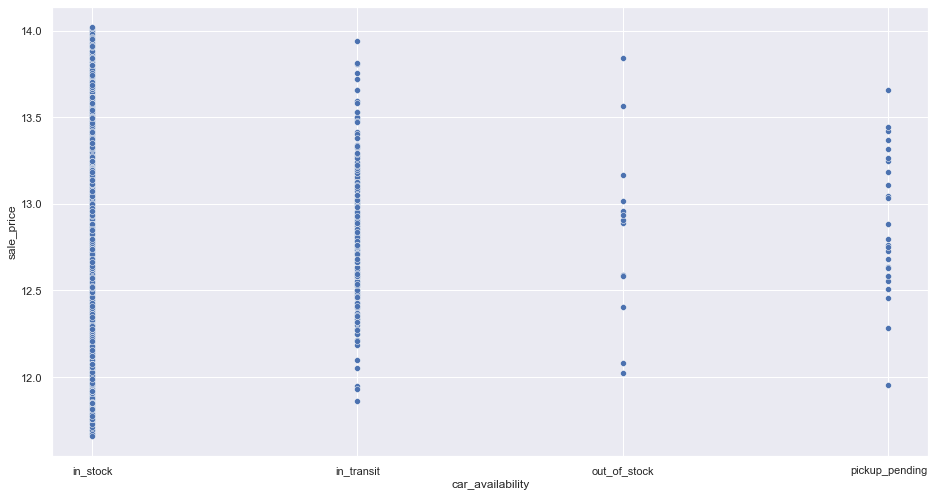

In [123]:
sns.scatterplot(x=df.car_availability, y=df.sale_price)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='model', ylabel='sale_price'>

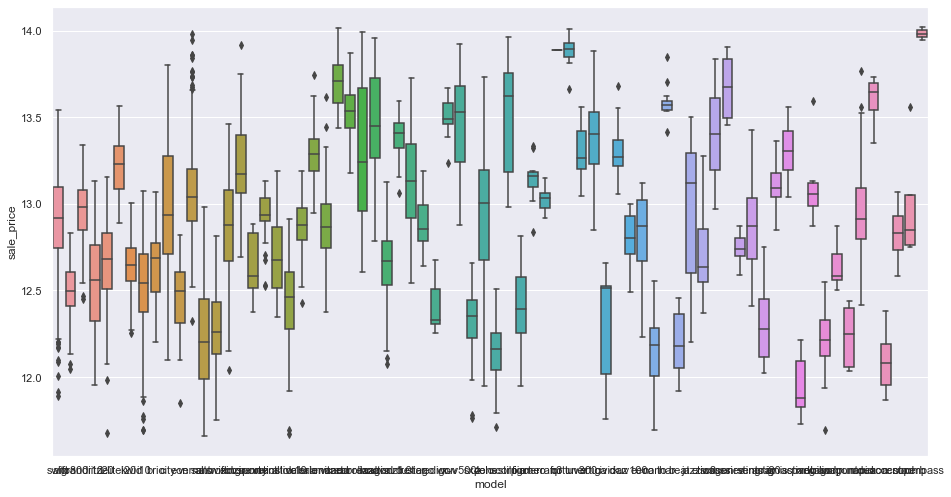

In [122]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot(x=df.model, y=df.sale_price)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

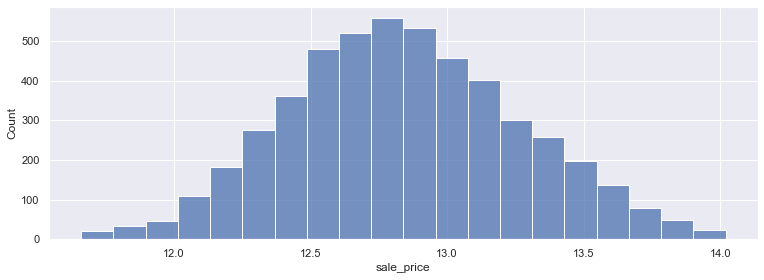

In [121]:
sns.histplot((df.sale_price), bins=20)

In [68]:
df.sale_price = np.log(df.sale_price)

In [311]:
def remove_outliers(main_data,column):
    threshold=2
    data = []
    mean=np.mean(column)
    std=np.std(column)
    print('Mean: {}, STD: {}'.format(mean,std))
    for i in range(len(column)):
        z_score=(column.iloc[i]-mean)/std
#         data.append(z_score)
        if np.abs(z_score)>threshold:
            main_data.drop(index=i,axis=0 ,inplace=True)
    return main_data
#     data.sort()
#     print(sorted(data,reverse=True))

In [329]:
# remove_outliers(df1, df1['sale_price'])

In [316]:
df1.sale_price.iloc[36]

12.925372348103702

In [291]:
df1.reset_index()
df1.sale_price.iloc[10]

13.480455916080679

In [92]:
df.yr_mfr = df.groupby('yr_mfr').filter(lambda x: len(x)>4)

In [100]:
%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='sale_price', ylabel='kms_run'>

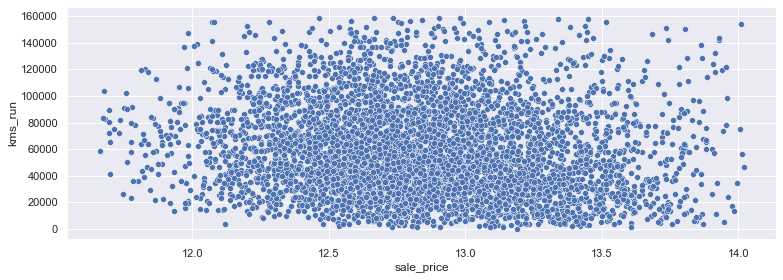

In [120]:
sns.set(rc={'figure.figsize':(12.7,4.27)})
sns.scatterplot(x=df.sale_price, y =df.kms_run)

<IPython.core.display.Javascript object>

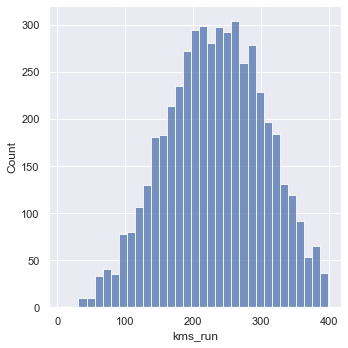

In [130]:
sns.displot(np.sqrt(df.kms_run))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='kms_run', ylabel='Count'>

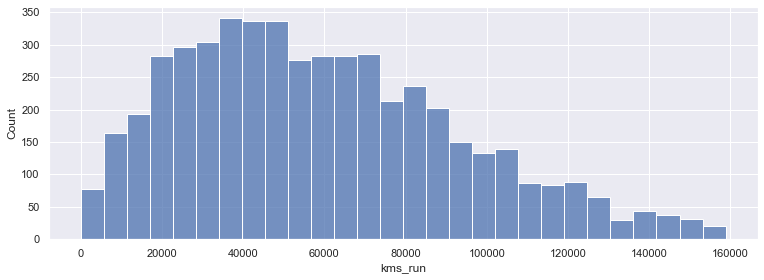

In [119]:
sns.histplot((df.kms_run))

In [138]:
def outlier_treatment(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [139]:
lower_range, upper_range = outlier_treatment(df.kms_run)
print('Lower: {}, Upper: {}'.format(lower_range, upper_range))
df[(df.sale_price < lower_range) | (df.sale_price > upper_range)]

Lower: -39857.375, Upper: 154509.625


In [118]:
df.drop(df[ (df.sale_price < lower_range) | (df.sale_price > upper_range) ].index , inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

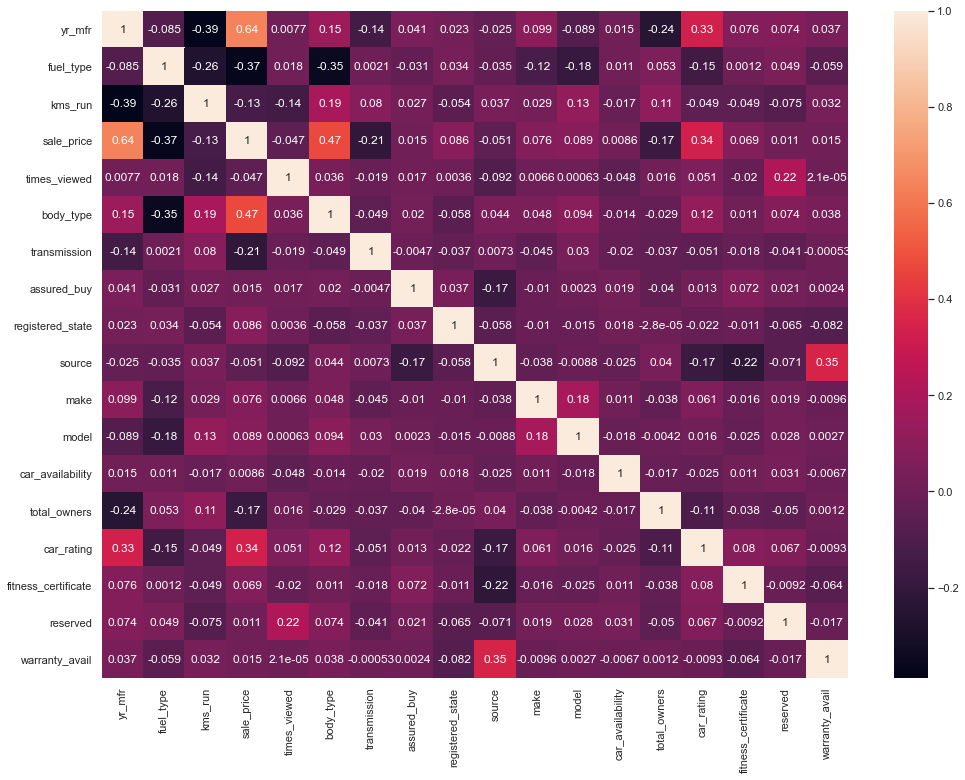

In [253]:
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(df.corr(), annot=True)

In [252]:
df.drop(columns=['is_hot'], axis=1, inplace=True)

In [142]:
df.model = df.model.apply(lambda x : x.split(' ')[0])

In [156]:
df.model = df.groupby('model').filter(lambda x : len(x)>20)

In [170]:
df.to_csv('./datalab/TrueValueCar/train_dataset.csv', index=False)

In [254]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,times_viewed,body_type,transmission,assured_buy,registered_state,source,make,model,car_availability,total_owners,car_rating,fitness_certificate,reserved,warranty_avail
0,2015,1,8063,12.864626,18715,0,1,1,1,0,10,54,0,2,2,1,0,0
1,2016,1,23104,12.489366,2676,0,1,1,9,0,10,4,0,1,2,1,0,0
2,2017,1,23402,13.076736,609,0,1,1,9,0,7,30,0,1,2,1,0,0
3,2013,0,39124,12.637852,6511,0,1,1,1,0,10,54,0,1,2,1,0,0
4,2015,1,22116,12.798015,3225,0,1,0,1,0,7,30,0,1,2,1,0,0


In [255]:
df.shape

(5022, 18)

In [256]:
df.columns

Index(['yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'times_viewed',
       'body_type', 'transmission', 'assured_buy', 'registered_state',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'car_rating', 'fitness_certificate', 'reserved', 'warranty_avail'],
      dtype='object')

In [151]:
df.fuel_type=pd.Categorical(df.fuel_type).codes
df.transmission=pd.Categorical(df.transmission).codes
df.assured_buy=pd.Categorical(df.assured_buy).codes
df.make=pd.Categorical(df.make).codes
df.model=pd.Categorical(df.model).codes
df.warranty_avail=pd.Categorical(df.warranty_avail).codes
df.registered_state=pd.Categorical(df.registered_state).codes
df.body_type=pd.Categorical(df.body_type).codes
df.reserved=pd.Categorical(df.reserved).codes
df.is_hot=pd.Categorical(df.is_hot).codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
df.source=pd.Categorical(df.source).codes
df.car_availability=pd.Categorical(df.car_availability).codes
df.car_rating=pd.Categorical(df.car_rating).codes
df.fitness_certificate=pd.Categorical(df.fitness_certificate).codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [257]:
X = df.drop(['sale_price'], axis=1).values

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
scaler = StandardScaler()

In [294]:
X = scaler.fit_transform(X)

In [203]:
# X = df.drop(['sale_price'], axis=1).values

In [259]:
Y = df['sale_price'].values

In [163]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [261]:
print('X: {}, Y {}'.format(X_train.shape, y_train.shape))

X: (4017, 17), Y (4017,)


In [262]:
X[0]

array([ 2015,     1,  8063, 18715,     0,     1,     1,     1,     0,
          10,    54,     0,     2,     2,     1,     0,     0],
      dtype=int64)

### Linear Regression

In [263]:
clf = LinearRegression()
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
metrics.r2_score(y_test, prediction)

0.6352060240824086

In [264]:
score = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    clf = LinearRegression()
    clf = clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score.append(metrics.r2_score(y_test, prediction))

np.argmax(score)

66

In [265]:
score[66]

0.7020143775415523

In [170]:
from sklearn.tree import DecisionTreeRegressor

In [171]:
from sklearn.metrics import mean_squared_log_error,r2_score, mean_absolute_error

In [266]:
regressor1 = DecisionTreeRegressor(max_depth=12, random_state=0)
regressor1 = regressor1.fit(X_train, y_train)
y_pred = regressor1.predict(X_test)
print('MAE of train data is:-',mean_absolute_error(y_test, y_pred))
print('r2_score of train data is:-',r2_score(y_train,regressor1.predict(X_train)))
print('r2_score of test data is:-',r2_score(y_test,y_pred))
print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(np.round(y_train),np.round(regressor1.predict(X_train)))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(np.round(y_test),np.round(regressor1.predict(X_test)))))

MAE of train data is:- 0.1320812339386762
r2_score of train data is:- 0.9436086151110084
r2_score of test data is:- 0.8150143231474483
mean_squared_log Train Error is  0.018458302703089745
mean_squared_log Test Error is  0.025700295413245415


In [218]:
# np.set_printoptions(precision=3)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:50])

In [182]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
regressor2=RandomForestRegressor(max_depth=13,random_state=0, n_estimators=90)
regressor2.fit(X_train,y_train)
print('MAE of train data is:-',mean_absolute_error(y_test, regressor2.predict(X_test)))
print('r2_score of train data is:-',r2_score(y_train,regressor2.predict(X_train)))
print('r2_score of test data is:-',r2_score(y_test,regressor2.predict(X_test)))

print("mean_squared_log Train Error is ",np.sqrt(mean_squared_log_error(y_train,regressor2.predict(X_train))))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(y_test,regressor2.predict(X_test))))

MAE of train data is:- 0.09825604918351284
r2_score of train data is:- 0.9728992410383618
r2_score of test data is:- 0.9060126584902732
mean_squared_log Train Error is  0.0050509609162904135
mean_squared_log Test Error is  0.009620141468868547


In [198]:
df.to_csv('./datalab/TrueValueCar/train_dataset.csv', index=False)

## Test Data

In [199]:
df1 = pd.read_csv('./datalab/TrueValueCar/test.csv')

<IPython.core.display.Javascript object>

In [318]:
df1.head()

,yr_mfr,fuel_type,kms_run,sale_price,times_viewed,body_type,transmission,assured_buy,registered_state,source,make,model,car_availability,total_owners,car_rating,fitness_certificate,reserved,warranty_avail
0,2012,2,69029,12.805730,2068,3,1,1,5,0,9,66,0,3,2,1,0,0
1,2013,2,45721,12.286726,903,0,1,1,1,0,6,28,0,1,2,1,0,0
2,2013,0,37395,12.867210,2809,3,1,1,5,0,5,6,0,1,2,1,1,0
3,2012,2,37652,12.806828,1054,0,1,1,4,0,6,38,1,3,2,1,1,0
5,2016,2,55724,13.453104,889,4,1,1,4,0,12,22,0,1,2,1,0,0


In [317]:
df1.shape

(783, 18)

In [202]:
df1.drop(columns=['id','car_name','rto','city','variant','ad_created_on','registered_city','original_price','booking_down_pymnt','broker_quote','emi_starts_from'],axis=1, inplace=True)

In [268]:
df1.drop(columns=['is_hot'],axis=1, inplace=True)

In [204]:
df1.model = df1.model.apply(lambda x : x.split(' ')[0])

In [212]:
df1.dropna(inplace=True)

In [216]:
df1.sale_price = np.log(df1.sale_price)

In [230]:
# lower_range, upper_range = outlier_treatment(df1.kms_run)
# print('Lower: {}, Upper: {}'.format(lower_range, upper_range))
# df1[(df1.kms_run < lower_range) | (df1.kms_run > upper_range)]

In [226]:
df1.drop(df1[ (df1.kms_run < lower_range) | (df1.kms_run > upper_range) ].index , inplace=True)

In [234]:
df1.fuel_type=pd.Categorical(df1.fuel_type).codes
df1.transmission=pd.Categorical(df1.transmission).codes
df1.assured_buy=pd.Categorical(df1.assured_buy).codes
df1.make=pd.Categorical(df1.make).codes
df1.model=pd.Categorical(df1.model).codes
df1.warranty_avail=pd.Categorical(df1.warranty_avail).codes
df1.registered_state=pd.Categorical(df1.registered_state).codes
df1.body_type=pd.Categorical(df1.body_type).codes
df1.reserved=pd.Categorical(df1.reserved).codes
df1.is_hot=pd.Categorical(df1.is_hot).codes
df1.source=pd.Categorical(df1.source).codes
df1.car_availability=pd.Categorical(df1.car_availability).codes
df1.car_rating=pd.Categorical(df1.car_rating).codes
df1.fitness_certificate=pd.Categorical(df1.fitness_certificate).codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
X1 = df1.drop(columns=['sale_price'], axis=1)[:600].values

In [326]:
Y1 = df1['sale_price'][:600].values

In [328]:
print('MAE of train data is:-',mean_absolute_error(Y1, regressor2.predict(X1)))
print('r2_score of test data is:-',r2_score(Y1,regressor2.predict(X1)))
print("mean_squared_log Test Error is ",np.sqrt(mean_squared_log_error(Y1,regressor2.predict(X1))))

MAE of train data is:- 0.16664165602976566
r2_score of test data is:- 0.7572963470768427
mean_squared_log Test Error is  0.016265506280865705


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

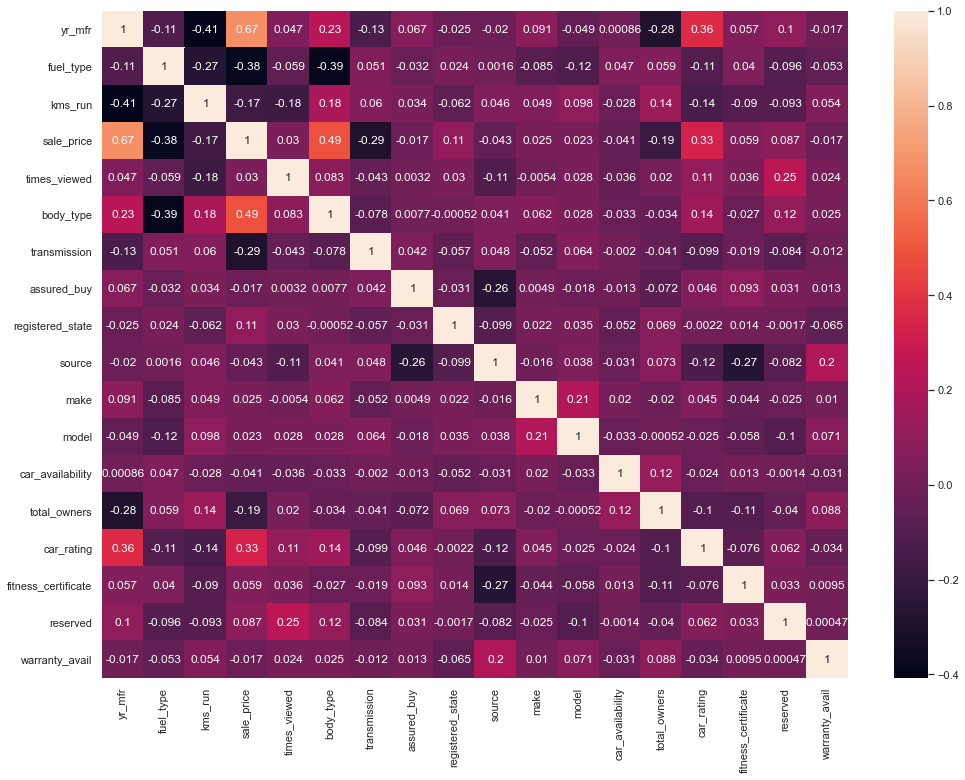

In [324]:
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(df1.corr(), annot=True)